# Simple GAN

In [59]:
import torch
import torchvision
from matplotlib import pyplot as plt
import PIL
import numpy as np

# Dataset

In [69]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

In [70]:
dataset = torchvision.datasets.MNIST('./',train=True, download=True, transform=transform)

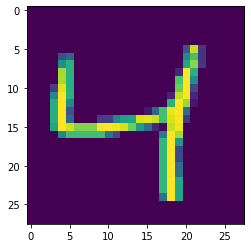

In [74]:
image = dataset[2]
plt.imshow(image[0].numpy().transpose(1,2,0))

## Generator

In [141]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # random noise: 64
        self.linear1 = torch.nn.Linear(64,256)
        self.l_relu = torch.nn.LeakyReLU(0.1)
        # out image 28 *28 -> 784
        self.linear2  = torch.nn.Linear(256,784)
        self.tan = torch.nn.Tanh()
    def forward(self, img):
        x1 = self.linear1(img.clone())
        x2 = self.l_relu(x1.clone())
        x3 = self.linear2(x2.clone())
#         print(x.size())
        x = self.tan(x3)
        return x

## Discriminator

In [142]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.linear1 = torch.nn.Linear(28*28,256)
        self.l_relu = torch.nn.LeakyReLU(0.1)
        self.linear2 = torch.nn.Linear(256,1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, img):
        x1 = self.linear1(img)
        x2 = self.l_relu(x1.clone())
        x3 = self.linear2(x2.clone())
        x = self.sigmoid(x3.clone())
        return x
        

## Hyperparameters

In [143]:
lr = 0.001
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"

epochs = 10
batch_size = 1
disc = Discriminator().to(device)
gen = Generator().to(device)

optim_disc = torch.optim.Adam(disc.parameters(), lr=lr)
optim_gen = torch.optim.Adam(gen.parameters(), lr=lr)

disc_criteria = torch.nn.BCELoss()


In [144]:
for i in range(epochs):
    for real_img, _ in dataset:
        with torch.autograd.set_detect_anomaly(True):
            real_img_flat = real_img.view(-1, 28*28*1)

            random_noise = torch.randn(batch_size, 64).to(device)
#             print(random_noise.size())
            fake_img = gen(random_noise)
#             print(fake_img.size())

            # GEN
            pred_fake_gen = disc(fake_img.clone())
            loss_gen = disc_criteria(pred_fake_gen.clone(), torch.ones_like(pred_fake_gen.clone()))
            optim_gen.zero_grad()
            loss_gen.backward(retain_graph=True)
            optim_gen.step()

            # Disc
            # If you want to use batch_size use Dataloader
            pred_real = disc(real_img_flat.clone())
            pred_fake = disc(torch.randn(1,784))
#             print(pred_real)
#             actual_out_real = torch.ones(1)
#             actual_out_fake = torch.zeros(1)

#             loss_real = disc_criteria(pred_real.clone(), actual_out_real.clone())
#             loss_fake = disc_criteria(pred_fake.clone(), actual_out_fake.clone())
#             loss = (loss_real.clone() + loss_fake.clone()) / 2
#             disc.zero_grad()
            # or optim_disc.zero_grad()
#             print(fake_img)
#             l = loss.clone()
            m =  fake_img.clone().sum()
            m.backward()
#             optim_disc.step()
            break
        break


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [256, 784]], which is output 0 of TBackward, is at version 2; expected version 1 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [112]:
torch.ones(32).require_grad

AttributeError: 'Tensor' object has no attribute 'require_grad'

In [ ]:
torchvision.models.